In [1]:
import numpy as npo

import autograd.numpy as np
from autograd import grad
from autograd.scipy.integrate import odeint
from autograd.builtins import tuple
from autograd.misc.optimizers import adam

import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline  

import time
from tqdm import tqdm
from copy import deepcopy

In [2]:
def rhs(y, t, params): 
    params = np.array(params)
    errors = np.square(trueParams - params).sum() / 10 
    return -y + errors

In [3]:
trueParams = npo.random.uniform(low=-1.0, high=1.0, size=(3, ))
print('trueParams: min, max', trueParams.min(), trueParams.max())
print('len(trueParams)', len(trueParams))

trueParams: min, max 0.310220497143 0.818810926469
len(trueParams) 3


In [4]:
tspan      = np.linspace(0, 100, 101) / 30
true_y     = odeint(rhs, y0=3, t=tspan, args=(trueParams, ))

In [5]:
initParams = [0.0] * len(trueParams)
pred_y     = odeint(rhs, y0=3, t=tspan, args=(initParams, ))

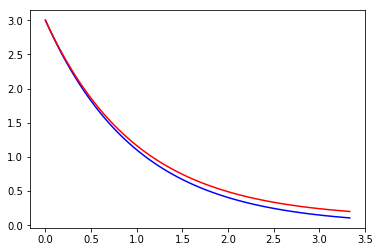

In [6]:
plt.plot(tspan, true_y, 'b-')
plt.plot(tspan, pred_y, 'r-')

In [7]:
def odeloss(params, epoch):
    pred_y = odeint(rhs, 3, tspan, tuple((params, )))
    return np.square(true_y - pred_y).mean()

In [8]:
def finitedifferenceLoss(params, epoch):
    params  = np.array(params)
    shape   = params.shape
    epsilon = 1e-5
    def getLoss(p):
        pred_y = odeint(rhs, 3, tspan, tuple((p, )))
        loss   = np.square(true_y - pred_y).mean()
        return loss

    loss_0    = getLoss(params)
    gradients = []
    
    for i in range(len(params)):
        zeroArr    = np.zeros(shape=shape)
        zeroArr[i] = epsilon
        gradient   = np.array((getLoss(params + zeroArr) - loss_0) /  epsilon)
        gradients.append(gradient)
        
    return gradients

In [9]:
nIterations = 2000
pbar        = tqdm(range(nIterations))

def callback(params, epoch, gradients):
    pred_y    = odeint(rhs, 3, tspan, tuple((params, )))
    trainloss = np.square(true_y - pred_y).mean()
    
    params    = [round(float(p), 5) for p in params]
    
    pbar.set_description('trainloss: {:.5f} | params: {}'.format(trainloss, params))
    pbar.update(1)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [10]:
print(trueParams)
optParams  = adam(finitedifferenceLoss, initParams, num_iters=nIterations, callback=callback, step_size=0.01)

trainloss: 0.00297 | params: [0.08831, 0.08786, 0.08867]:   0%|          | 10/2000 [00:00<00:20, 95.74it/s]

[ 0.46099323  0.3102205   0.81881093]


trainloss: 0.00000 | params: [0.46018, 0.31022, 0.77906]: 100%|██████████| 2000/2000 [00:20<00:00, 96.29it/s] 